# TIME RESOLVED ABSORBANCE SPECTRA EXAMPLE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

Data file: `DATA3DABC.txt`

Data set: 

- First row corresponds to wavelength vector.
- First column corresponds to time vector.
- From second column to last one correspond to absorbance for each wavelength

This is an example for the Python course. In this case we will learn how to plot in 2D, plot in
3D and an exponential fitting.
Here are the results made in *Python*.

In [3]:
data = pd.read_csv('../data/DATA3DABC.txt', 
                     delim_whitespace=True)
data.head()

,400,410,420,430,440,450,460,470,480,490,...,510,520,530,540,550,560,570,580,590,600
0.0,0.0661,0.2017,0.5000,0.7860,1.1268,1.3216,1.2874,1.2039,1.0212,0.8813,...,0.7773,0.6361,0.5539,0.4241,0.3110,0.2278,0.1283,0.0757,0.0367,0.0262
0.2,0.0924,0.1825,0.4382,0.7599,1.0307,1.2788,1.2326,1.1481,0.9752,0.8727,...,0.7718,0.6674,0.6159,0.5206,0.4223,0.3604,0.2311,0.1636,0.0631,0.0435
0.4,0.1068,0.1984,0.4115,0.7044,0.9822,1.1893,1.2093,1.0624,0.9881,0.8396,...,0.7747,0.7846,0.6690,0.5886,0.5462,0.3946,0.2835,0.2313,0.1517,0.0850
0.6,0.0439,0.2215,0.3719,0.7086,0.9656,1.1245,1.1348,1.0257,0.9310,0.8216,...,0.7963,0.7733,0.7440,0.6943,0.6129,0.5015,0.3572,0.2828,0.1717,0.0861
0.8,0.0630,0.1768,0.3483,0.6850,0.9040,1.0860,1.0907,1.0055,0.8997,0.8271,...,0.8062,0.8180,0.8179,0.7144,0.6680,0.5572,0.4128,0.3123,0.2205,0.1161


In [4]:
#Transpose the data, as we prefer time in columns and wavelength as index. Just a preference.
data = data.T
data

,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,...,8.2,8.4,8.6,8.8,9.0,9.2,9.4,9.6,9.8,10.0
400,0.0661,0.0924,0.1068,0.0439,0.0630,0.0665,0.0290,0.0778,0.0525,0.0924,...,0.0394,0.0330,0.0375,0.0374,-0.0041,0.0322,0.0204,0.0079,0.0087,0.0442
410,0.2017,0.1825,0.1984,0.2215,0.1768,0.1739,0.1439,0.1845,0.1500,0.1514,...,0.0717,0.0615,0.0552,0.0607,0.1170,0.0499,0.0227,0.0848,0.0602,0.0365
420,0.5000,0.4382,0.4115,0.3719,0.3483,0.3186,0.3274,0.3015,0.3189,0.2889,...,0.1315,0.1599,0.0874,0.1115,0.0808,0.1285,0.1284,0.0706,0.1342,0.0773
430,0.7860,0.7599,0.7044,0.7086,0.6850,0.6082,0.5440,0.5470,0.5150,0.4949,...,0.1856,0.1784,0.1981,0.2167,0.1934,0.1957,0.2010,0.1278,0.1668,0.1731
440,1.1268,1.0307,0.9822,0.9656,0.9040,0.8747,0.8089,0.7613,0.7720,0.7493,...,0.2803,0.2984,0.2641,0.2840,0.2733,0.2836,0.2502,0.2646,0.2627,0.2275
450,1.3216,1.2788,1.1893,1.1245,1.0860,1.0246,0.9932,0.9417,0.9057,0.8790,...,0.4125,0.3360,0.3601,0.3241,0.3561,0.3372,0.3373,0.3148,0.3188,0.3358
460,1.2874,1.2326,1.2093,1.1348,1.0907,1.0225,0.9903,0.9598,0.9172,0.8804,...,0.4085,0.3858,0.4195,0.3875,0.3938,0.3600,0.3504,0.3628,0.3546,0.3758
470,1.2039,1.1481,1.0624,1.0257,1.0055,0.9573,0.9519,0.9203,0.8552,0.8535,...,0.4387,0.4249,0.4159,0.4329,0.4392,0.4487,0.4064,0.4039,0.3852,0.4218
480,1.0212,0.9752,0.9881,0.9310,0.8997,0.8413,0.8425,0.8209,0.7701,0.7659,...,0.5075,0.4916,0.4713,0.4837,0.4649,0.4336,0.4200,0.4284,0.4521,0.4422
490,0.8813,0.8727,0.8396,0.8216,0.8271,0.8145,0.8302,0.7780,0.7612,0.7382,...,0.5819,0.6102,0.5896,0.5697,0.5725,0.5683,0.5758,0.5833,0.5625,0.5744


The index, which is the wavelength should be a floating point number:

In [7]:
data.index = data.index.astype(np.float)
data.head()

,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,...,8.2,8.4,8.6,8.8,9.0,9.2,9.4,9.6,9.8,10.0
400.0,0.0661,0.0924,0.1068,0.0439,0.0630,0.0665,0.0290,0.0778,0.0525,0.0924,...,0.0394,0.0330,0.0375,0.0374,-0.0041,0.0322,0.0204,0.0079,0.0087,0.0442
410.0,0.2017,0.1825,0.1984,0.2215,0.1768,0.1739,0.1439,0.1845,0.1500,0.1514,...,0.0717,0.0615,0.0552,0.0607,0.1170,0.0499,0.0227,0.0848,0.0602,0.0365
420.0,0.5000,0.4382,0.4115,0.3719,0.3483,0.3186,0.3274,0.3015,0.3189,0.2889,...,0.1315,0.1599,0.0874,0.1115,0.0808,0.1285,0.1284,0.0706,0.1342,0.0773
430.0,0.7860,0.7599,0.7044,0.7086,0.6850,0.6082,0.5440,0.5470,0.5150,0.4949,...,0.1856,0.1784,0.1981,0.2167,0.1934,0.1957,0.2010,0.1278,0.1668,0.1731
440.0,1.1268,1.0307,0.9822,0.9656,0.9040,0.8747,0.8089,0.7613,0.7720,0.7493,...,0.2803,0.2984,0.2641,0.2840,0.2733,0.2836,0.2502,0.2646,0.2627,0.2275


## 2D Plot

This is some `[::4]` of the curves at different points.

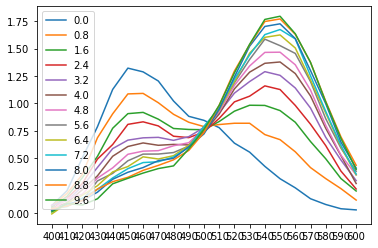

In [7]:
plt.figure(figsize=(6,4))
for time in data.columns[::4]:
    plt.plot(data[time], label=time)
plt.legend(loc='best')

for sequential data, it is probably better to use a sequential colormap such as _viridis_.

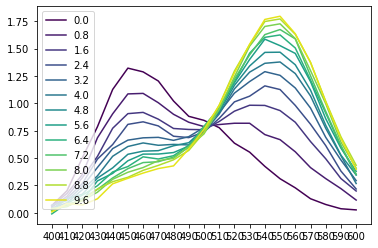

In [8]:
plt.figure(figsize=(6,4))
for time in data.columns[::4]:
    plt.plot(data[time], label=time, color=cm.viridis(time/data.columns.max()))
plt.legend(loc='best');

And this is how a given wavelength evolves (in particular the wavelength close to the second maximum).

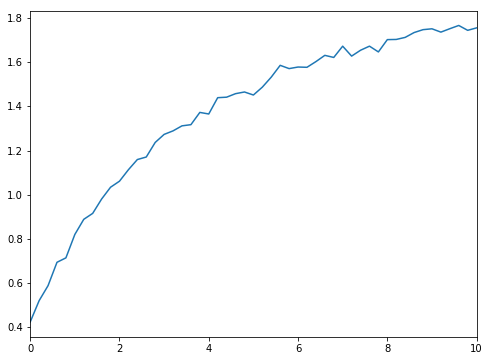

In [9]:
data.loc[540,:].plot()

Here is another way to plot the data, in 2D.

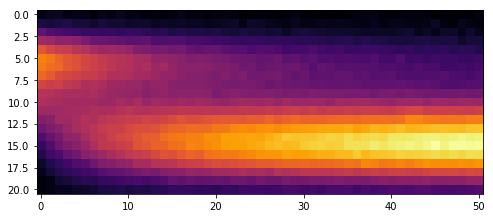

In [10]:
plt.imshow(data, cmap='inferno')

And here a way to plot it in 3D.

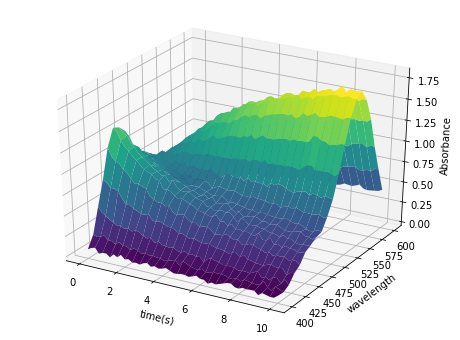

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
XI, YI = np.meshgrid(data.columns,data.index )
surf = ax.plot_surface(XI, YI, data.values,cmap=cm.viridis)
ax.set_xlabel('time(s)')
ax.set_ylabel('wavelength')
ax.set_zlabel('Absorbance');

## Exponential fit

Enough of plotting. Now we want to get data about the kinetics of the process. For that we will try to fit to an exponential the abosorbance at 540 nm.

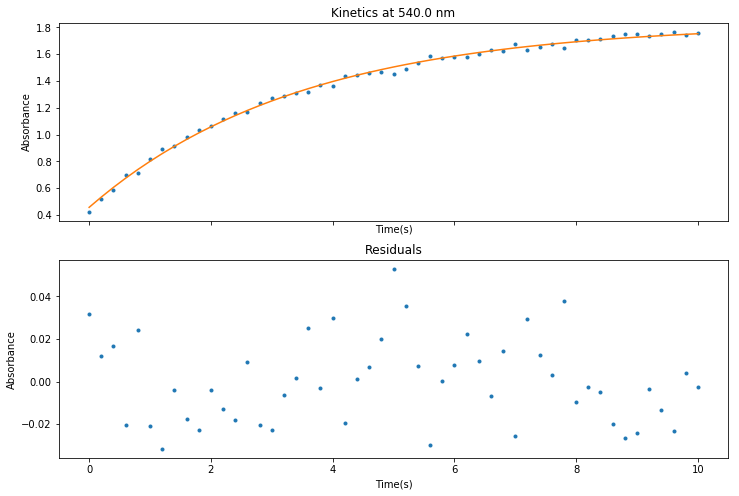

In [14]:
from scipy.optimize import curve_fit
#Data
x = data.columns
y = data.loc[540.]

#Model
def func(x, a, b, c):
     return a * np.exp(-b * x) + c
#Best fit parameters
p, cov = curve_fit(func,x,y)

#PLOT
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))
#Plot Data-model
ax1.plot(x,y,'.') #Noisy data
ax1.plot(x,func(x,*p),'-') #Best fit model
ax1.set_title('Kinetics at {} nm'.format(y.name))
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Absorbance')
#Residual plot
difference = func(x,*p) - y
ax2.plot(x,difference,'.')
ax2.set_title('Residuals')
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Absorbance');

## Not using pandas

One can also only use numpy, but then one has to keep track of wavelength and the times in different arrays and iterate them accordingly. Here is an example with just the first figure:

In [52]:
wave = np.genfromtxt('../data/DATA3DABC.txt', max_rows=1)
data2 =np.genfromtxt('./data/DATA3DABC.txt', skip_header=1)
times = data2[:,0] #First column is time
z = data2[:,1:] # and the remaining are data

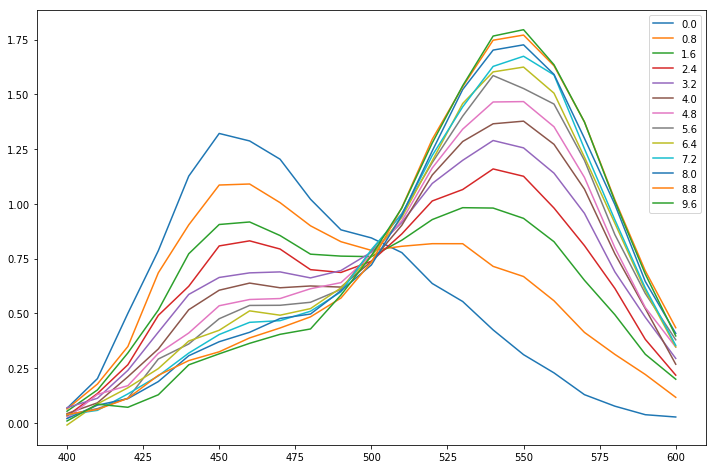

In [65]:
for t_i,z_i in zip(times[::4], z[::4]):
    plt.plot(wave, z_i, label=t_i)
plt.legend(loc='best')

for sequential data, it is probably better to use a sequential colormap such as _viridis_.

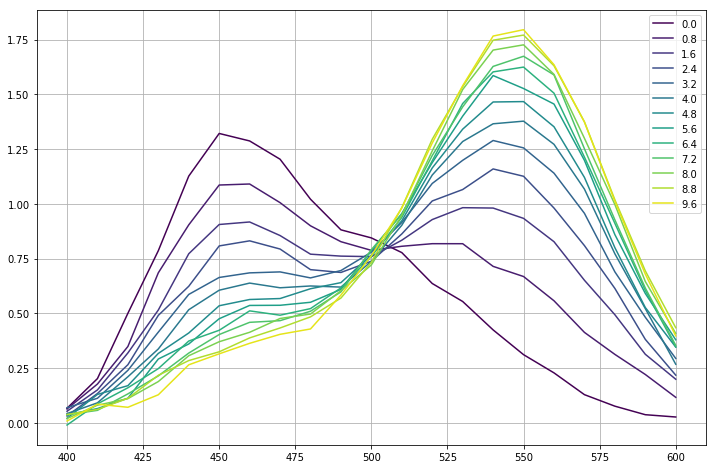

In [67]:
for t_i,z_i in zip(times[::4], z[::4]):
    plt.plot(wave, z_i, label=t_i, color=cm.viridis(t_i/times[-1]))
plt.legend(loc='best')
plt.grid()